In [ ]:
!pip install pydicom opencv-python matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 11.0 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

# This will allow you to upload the DICOM file manually.

Saving ff0200e1-3bac-42d1-880b-17d6a3366d2c.dcm to ff0200e1-3bac-42d1-880b-17d6a3366d2c.dcm


In [ ]:
import os
os.listdir()

['.config', 'fffb2395-8edd-4954-8a89-ffe2fd329be3.dcm', 'sample_data']

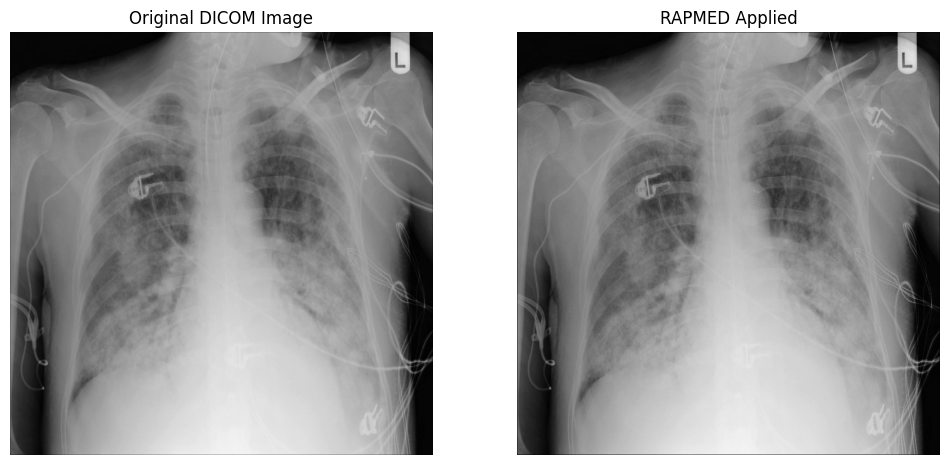

In [ ]:
import pydicom
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to read DICOM files and convert to a format suitable for processing
def read_dicom_image(dicom_path):
    # Read the DICOM file
    dicom_data = pydicom.dcmread(dicom_path)

    # Extract pixel array
    image = dicom_data.pixel_array

    # Normalize the image pixel values to range 0-255 (if necessary)
    image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    return image

# RAPMED function adapted for DICOM images
def apply_rapmed(image, window_size=3):
    # Define the window for the median filter
    half_window = window_size // 2

    # Initialize an empty image for RAPMED output
    rapmed_image = np.zeros_like(image)

    # Apply a rank-based adaptive median filter
    for i in range(half_window, image.shape[0] - half_window):
        for j in range(half_window, image.shape[1] - half_window):
            # Extract the window around the current pixel
            window = image[i - half_window:i + half_window + 1, j - half_window:j + half_window + 1]

            # Compute the median of the window
            median_value = np.median(window)

            # Rank-based enhancement (simulating rank-adjusted intensity)
            rapmed_image[i, j] = np.clip(image[i, j] + (image[i, j] - median_value), 0, 255)

    return image, rapmed_image

# Display the original and RAPMED-applied images side by side
def display_images(dicom_path):
    original_image = read_dicom_image(dicom_path)
    _, rapmed_image = apply_rapmed(original_image)

    # Plot the original and RAPMED-applied images side by side
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(original_image, cmap='gray')
    ax[0].set_title("Original DICOM Image")
    ax[0].axis('off')

    ax[1].imshow(rapmed_image, cmap='gray')
    ax[1].set_title("RAPMED Applied")
    ax[1].axis('off')

    plt.show()

# Example usage
dicom_image_path = 'fffb2395-8edd-4954-8a89-ffe2fd329be3.dcm'
display_images(dicom_image_path)
